# <center>Parshwa-Sheth</center>
# <center>Saumya-Shah</center>
# <center>Yesha-Thakkar</center>

# <center>Real Estate Prediction (Bangalore)</center>

### Importing Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### Reading .csv file

In [2]:
df=pd.read_csv("C:/Users/parsh/OneDrive/Desktop/Presentation/ahem_prices.csv")
df.head()

,location,size,total_sqft,bath,price
0,Naranpura,3,3200,3,49.99
1,Sola,2,2000,2,23.55
2,Ghatlodia,4,5000,3,88.00
3,Bopal,5,4500,4,76.77
4,Sanand,2,2200,2,25.78


### Infromation About Data

In [3]:
df.shape

(1014, 5)

In [4]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

### Cleaning Data-Checking null values

In [5]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Droping null values

In [6]:
df.shape


(1014, 5)

In [7]:
df['size'].unique()

array([ 3,  2,  4,  5,  6,  7,  1,  8, 10], dtype=int64)

### In total_sqft there is range printing that

### Converting that range into average

In [8]:
df.loc[30]

location      Memnagar
size                 4
total_sqft        3600
bath                 4
price             45.7
Name: 30, dtype: object

## Visualization

In [9]:
import seaborn as sns

C:\Users\parsh\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


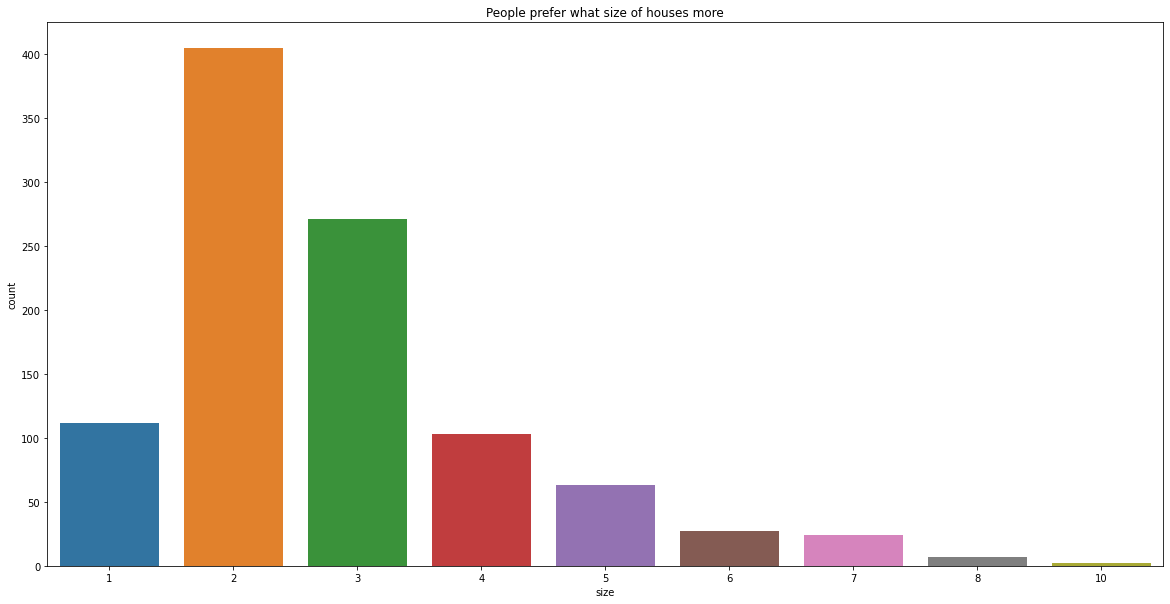

In [10]:
plt.title('People prefer what size of houses more')
sns.countplot(df['size']);


C:\Users\parsh\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


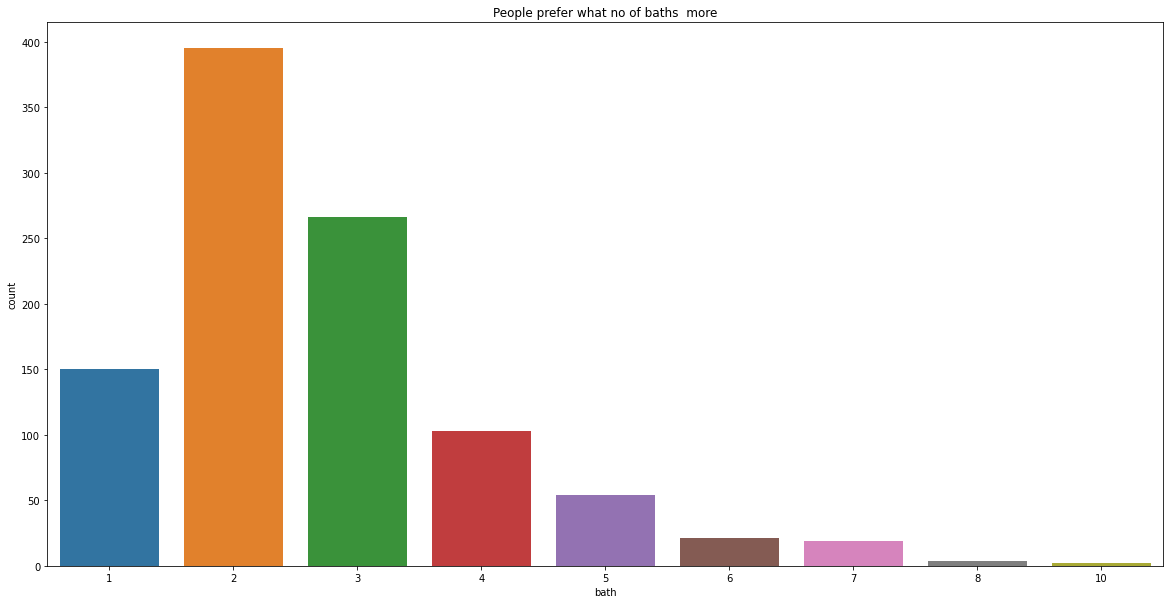

In [11]:
plt.title('People prefer what no of baths  more')
sns.countplot(df['bath']);

C:\Users\parsh\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


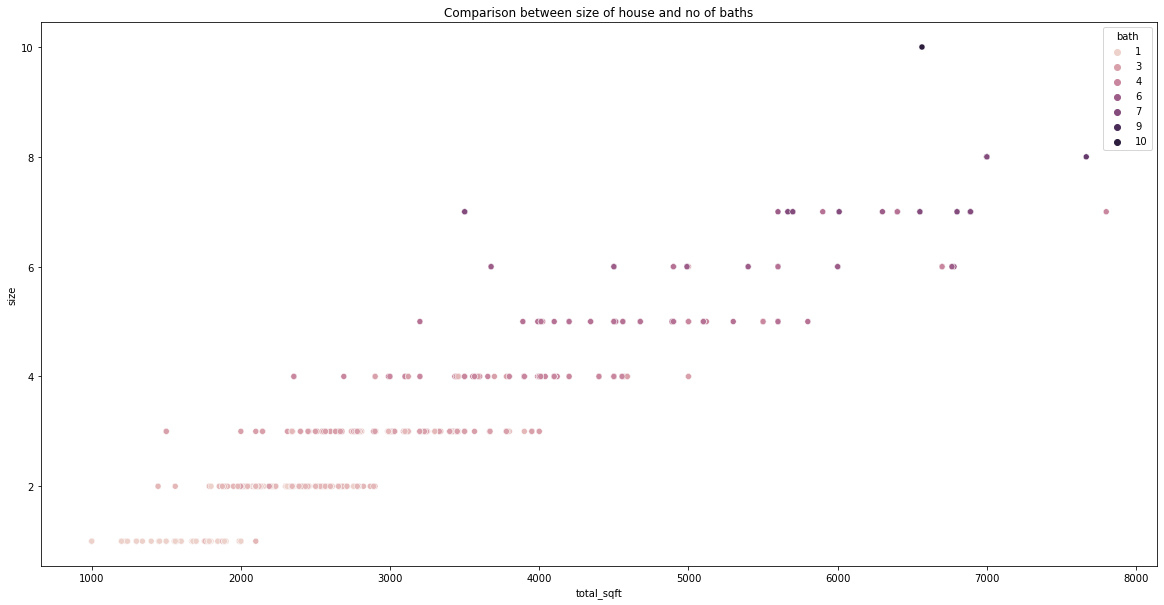

In [12]:
plt.title('Comparison between size of house and no of baths')
sns.scatterplot(df['total_sqft'], df['size'], hue = df['bath']);

## Visualization 

(0.0, 10.450269345650733)

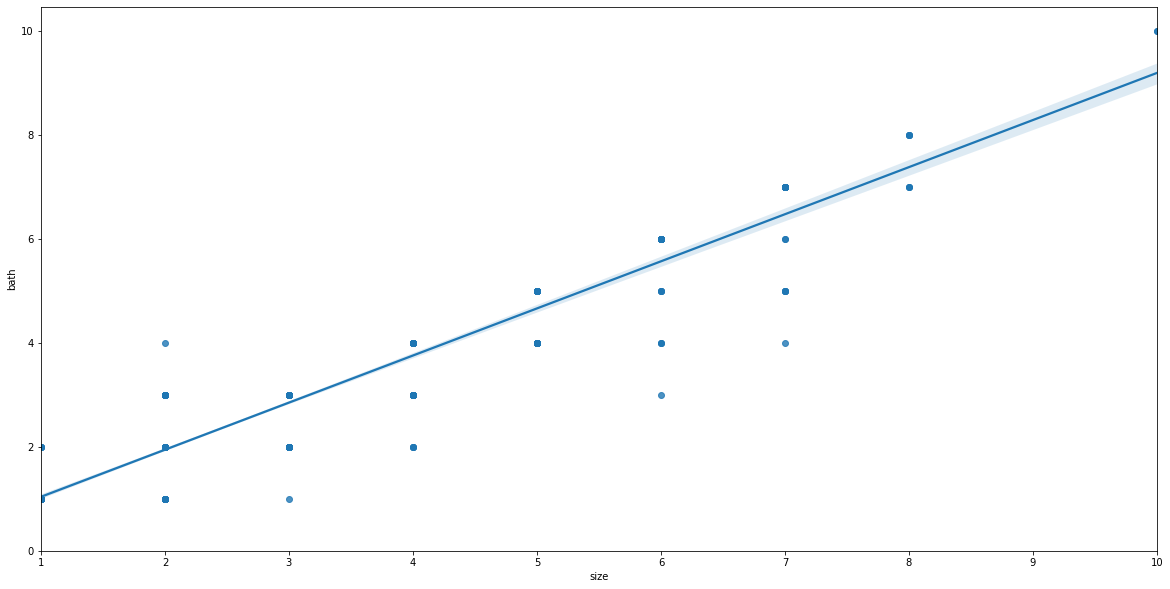

In [13]:
sns.regplot(x="size", y="bath", data=df)
plt.ylim(0,)

(0.0, 10.474863568618089)

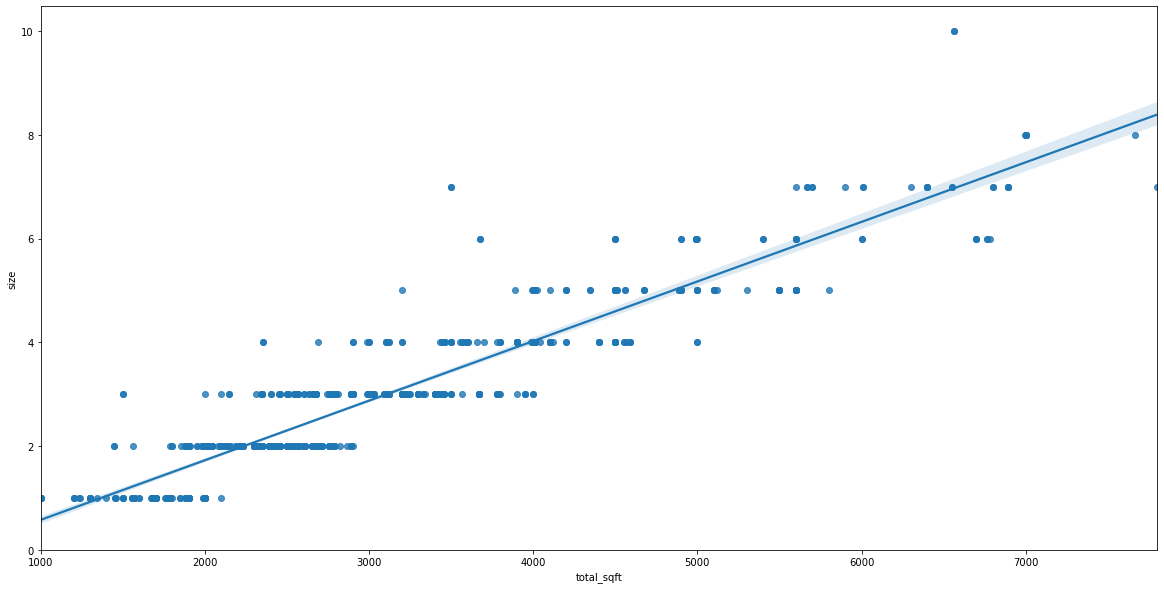

In [14]:
sns.regplot(x="total_sqft", y="size", data=df)
plt.ylim(0,)

(0.0, 163.585)

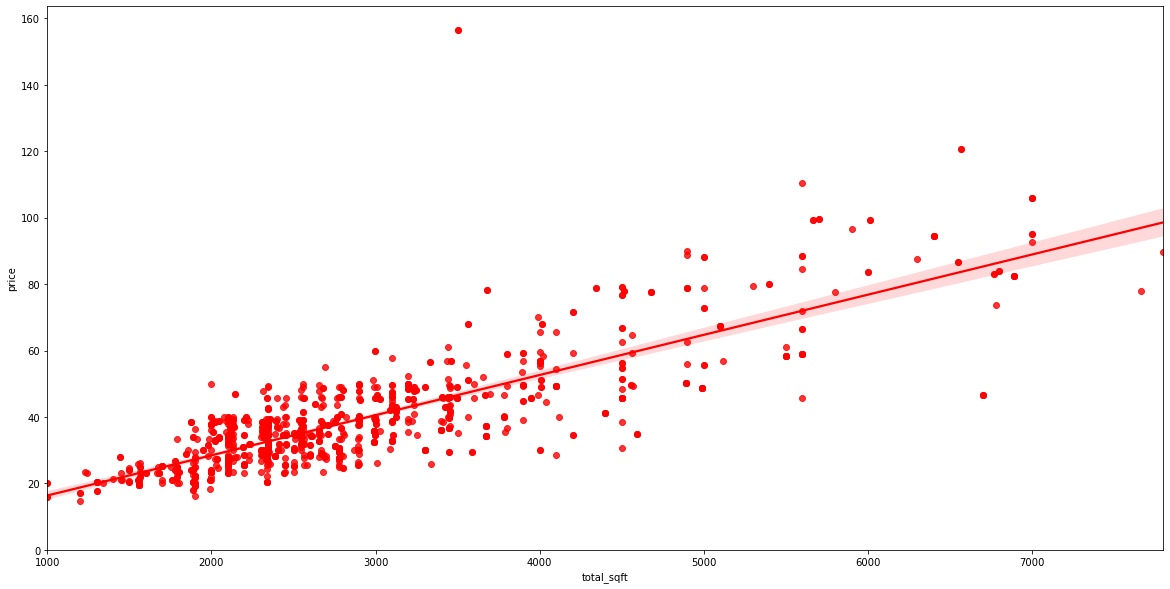

In [15]:
sns.regplot(x="total_sqft", y="price", data=df,color='red')
plt.ylim(0,)

## Feature Engineering

In [16]:
df4=df.copy()

In [17]:
df4.head(10)

,location,size,total_sqft,bath,price
0,Naranpura,3,3200,3,49.99
1,Sola,2,2000,2,23.55
2,Ghatlodia,4,5000,3,88.00
3,Bopal,5,4500,4,76.77
4,Sanand,2,2200,2,25.78
5,Bopal,6,6000,6,83.66
6,Paldi,4,2900,3,47.88
7,Paldi,7,3500,7,156.50
8,Sola,1,1000,1,19.99
9,Navrangpura,2,2500,2,25.22


In [18]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Naranpura,3,3200,3,49.99,1562.187500
1,Sola,2,2000,2,23.55,1177.500000
2,Ghatlodia,4,5000,3,88.00,1760.000000
3,Bopal,5,4500,4,76.77,1706.000000
4,Sanand,2,2200,2,25.78,1171.818182
5,Bopal,6,6000,6,83.66,1394.333333
6,Paldi,4,2900,3,47.88,1651.034483
7,Paldi,7,3500,7,156.50,4471.428571
8,Sola,1,1000,1,19.99,1999.000000
9,Navrangpura,2,2500,2,25.22,1008.800000


In [19]:
len(df4.location.unique())

56

In [20]:
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(25)

location
Vasna               63
Sola                54
Ghatlodia           38
Pragatinagar        37
Paldi               34
University          31
Bopal               31
Ambli Gam           30
Anandnagar          30
Dharnidhar          28
Thaltej             27
Bhatha              27
Shivranjni          26
Sanand              26
Juhapura            26
Chandranagar        24
Memnagar            24
Iscon Cross Road    24
Maninagar           24
Dariyapur           24
Naranpura           23
AEC                 23
Jhansi Ki Rani      22
Nehrunagar          20
Kalupur             19
Name: location, dtype: int64

In [21]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1014.000000
mean     1375.013995
std       312.112736
min       680.000000
25%      1171.818182
50%      1346.153846
75%      1560.294237
max      4471.428571
Name: price_per_sqft, dtype: float64

In [22]:
location_stats.values.sum()

1014

In [23]:
len(location_stats[location_stats>10])

37

In [24]:
len(location_stats)

56

In [25]:
len(location_stats[location_stats<=10])

19

In [26]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10


location
Kankaria            10
Shyamal             10
Vejalpur            10
Commerce 6 roads     9
Makarba              9
Sarkhej              7
Ambawadi             7
Panjrapol            6
CG Road              6
GulbaiTekra          5
Usmanpura            4
Behrampura           3
Ayojan nagar         3
Chandlodia           2
Ellis Bridge         2
Bodakdev             2
Motera               2
Vastral              1
Aslali               1
Name: location, dtype: int64

In [27]:
df4.location=df4.location.apply(lambda x :'other' if x in location_stats_less_than_10 else x)
df4.location


0       Naranpura
1            Sola
2       Ghatlodia
3           Bopal
4          Sanand
          ...    
1009    Ghatlodia
1010          AEC
1011        other
1012     Memnagar
1013    Ambli Gam
Name: location, Length: 1014, dtype: object

In [28]:
len(df4.location.unique())

38

In [29]:
df4.head(25)


,location,size,total_sqft,bath,price,price_per_sqft
0,Naranpura,3,3200,3,49.99,1562.187500
1,Sola,2,2000,2,23.55,1177.500000
2,Ghatlodia,4,5000,3,88.00,1760.000000
3,Bopal,5,4500,4,76.77,1706.000000
4,Sanand,2,2200,2,25.78,1171.818182
5,Bopal,6,6000,6,83.66,1394.333333
6,Paldi,4,2900,3,47.88,1651.034483
7,Paldi,7,3500,7,156.50,4471.428571
8,Sola,1,1000,1,19.99,1999.000000
9,Navrangpura,2,2500,2,25.22,1008.800000


# Outlier Removal

In [30]:
df4

,location,size,total_sqft,bath,price,price_per_sqft
0,Naranpura,3,3200,3,49.99,1562.187500
1,Sola,2,2000,2,23.55,1177.500000
2,Ghatlodia,4,5000,3,88.00,1760.000000
3,Bopal,5,4500,4,76.77,1706.000000
4,Sanand,2,2200,2,25.78,1171.818182
...,...,...,...,...,...,...
1009,Ghatlodia,2,2190,3,31.00,1415.525114
1010,AEC,3,2899,3,39.99,1379.441187
1011,other,2,2433,2,34.67,1424.989725
1012,Memnagar,8,7000,7,105.99,1514.142857


In [31]:
df4.shape

(1014, 6)

In [32]:
df4[df4.total_sqft/df4.size<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Naranpura,3,3200,3,49.99,1562.187500
1,Sola,2,2000,2,23.55,1177.500000
2,Ghatlodia,4,5000,3,88.00,1760.000000
3,Bopal,5,4500,4,76.77,1706.000000
4,Sanand,2,2200,2,25.78,1171.818182


### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [33]:
df4.shape


(1014, 6)

In [34]:
df5 = df4[~(df4.total_sqft/df4.size<300)]
df5.shape

(0, 6)

### Outlier Removal Using Standard Deviation and Mean

### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470.588235, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(0, 0)

In [36]:
df6.head(10)

""


### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like 

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

Text(0, 0.5, 'Count')

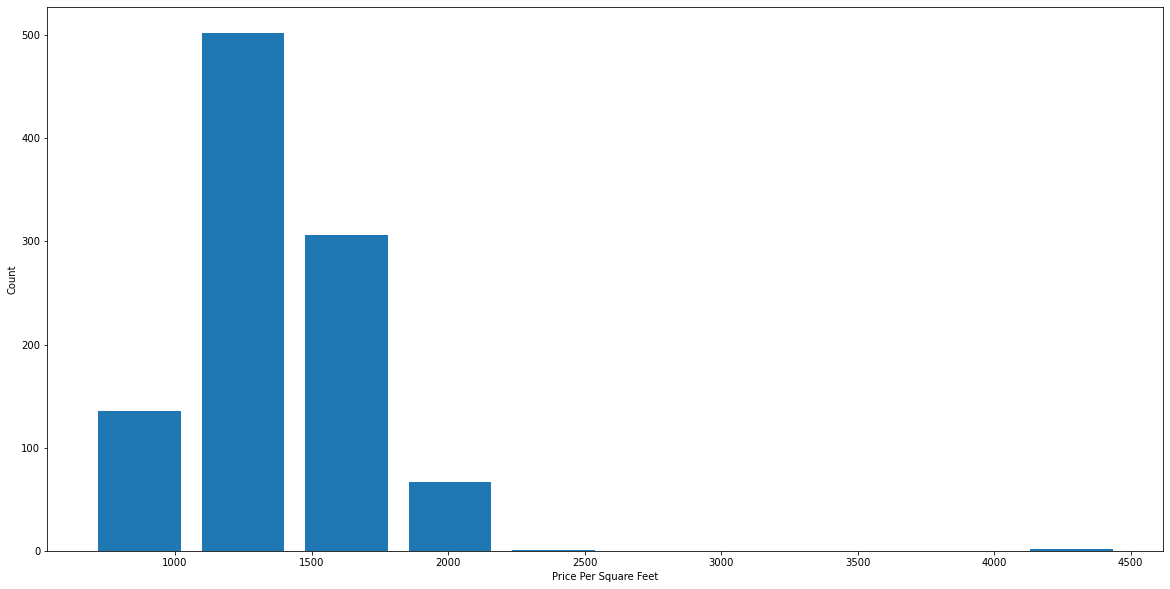

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
df4.bath.unique()

array([ 3,  2,  4,  6,  7,  1,  5,  8, 10], dtype=int64)

Text(0, 0.5, 'Count')

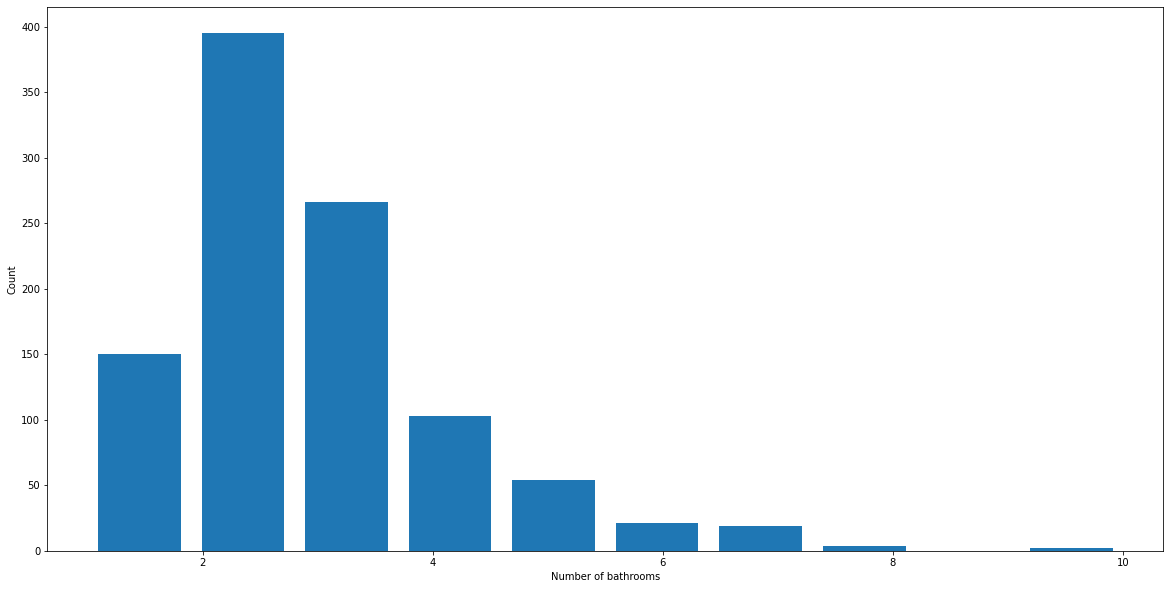

In [39]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [41]:
df4[df4.bath>df4.size+2]

,location,size,total_sqft,bath,price,price_per_sqft


####  if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed 

In [42]:
df8 = df4[df4.bath<df4.size+2]
df8.shape
df8.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Naranpura,3,3200,3,49.99,1562.187500
1,Sola,2,2000,2,23.55,1177.500000
2,Ghatlodia,4,5000,3,88.00,1760.000000
3,Bopal,5,4500,4,76.77,1706.000000
4,Sanand,2,2200,2,25.78,1171.818182


In [43]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9.head(3)

,location,size,total_sqft,bath,price
0,Naranpura,3,3200,3,49.99
1,Sola,2,2000,2,23.55
2,Ghatlodia,4,5000,3,88.00


### Use One Hot Encoding For Location 

In [44]:
dummies = pd.get_dummies(df9.location)
dummies.head(25)

,AEC,Ambli Gam,Anandnagar,Bhatha,Bopal,Chandkheda,Chandranagar,Dariyapur,Darpan 6 Roads,Dharnidhar,...,Raipur,SG Highway,Sanand,Shivranjni,Sola,Sterling City,Thaltej,University,Vasna,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,size,total_sqft,bath,price,AEC,Ambli Gam,Anandnagar,Bhatha,Bopal,...,Pragatinagar,Raipur,SG Highway,Sanand,Shivranjni,Sola,Sterling City,Thaltej,University,Vasna
0,Naranpura,3,3200,3,49.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola,2,2000,2,23.55,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Ghatlodia,4,5000,3,88.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bopal,5,4500,4,76.77,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sanand,2,2200,2,25.78,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,size,total_sqft,bath,price,AEC,Ambli Gam,Anandnagar,Bhatha,Bopal,Chandkheda,...,Pragatinagar,Raipur,SG Highway,Sanand,Shivranjni,Sola,Sterling City,Thaltej,University,Vasna
0,3,3200,3,49.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2000,2,23.55,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Build a Model Now... 

In [47]:
df11.shape

(1014, 41)

In [48]:
X = df11.drop(['price'],axis='columns')
X.head(3)


,size,total_sqft,bath,AEC,Ambli Gam,Anandnagar,Bhatha,Bopal,Chandkheda,Chandranagar,...,Pragatinagar,Raipur,SG Highway,Sanand,Shivranjni,Sola,Sterling City,Thaltej,University,Vasna
0,3,3200,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,5000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X.shape

(1014, 40)

In [50]:
df12=df10.copy()
df12.drop(['location'],axis='columns')

,size,total_sqft,bath,price,AEC,Ambli Gam,Anandnagar,Bhatha,Bopal,Chandkheda,...,Pragatinagar,Raipur,SG Highway,Sanand,Shivranjni,Sola,Sterling City,Thaltej,University,Vasna
0,3,3200,3,49.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2000,2,23.55,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,5000,3,88.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,4500,4,76.77,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2200,2,25.78,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,2,2190,3,31.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,3,2899,3,39.99,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,2,2433,2,34.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,8,7000,7,105.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df12.price
y.head()

0    49.99
1    23.55
2    88.00
3    76.77
4    25.78
Name: price, dtype: float64

In [52]:
len(y)

1014

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7621324334680459

### Use K Fold cross validation to measure accuracy of our LinearRegression model 

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83102971, 0.82839034, 0.81947772, 0.77615808, 0.80756642])

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [56]:
X.columns

Index(['size', 'total_sqft', 'bath', 'AEC', 'Ambli Gam', 'Anandnagar',
       'Bhatha', 'Bopal', 'Chandkheda', 'Chandranagar', 'Dariyapur',
       'Darpan 6 Roads', 'Dharnidhar', 'Ghatlodia', 'Ghuma', 'ISRO',
       'Iscon Cross Road', 'Jhansi Ki Rani', 'Jodhpur Road', 'Juhapura',
       'Kalupur', 'L Colony', 'Lal Darwaja', 'Maninagar', 'Memnagar',
       'Naranpura', 'Naroda', 'Navrangpura', 'Nehrunagar', 'Paldi',
       'Pragatinagar', 'Raipur', 'SG Highway', 'Sanand', 'Shivranjni', 'Sola',
       'Sterling City', 'Thaltej', 'University', 'Vasna'],
      dtype='object')

### Test the model for few properties 

In [57]:
def predict_price(location,total_sqft,size,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = total_sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [58]:
predict_price('AEC',1000, 2, 2)

32.23779905999152

In [59]:
predict_price('Nehrunagar',1000, 3, 3)


47.32059394431067

In [60]:
predict_price('Paldi',1000, 3, 3)

50.55839169514918

In [61]:
predict_price('SG Highway',3000, 3, 3)

45.976374298558596

In [62]:
import pickle
with open('ahmed.pickle','wb') as f1:
    pickle.dump(lr_clf,f1)

In [63]:
import json
columns = { 
    'data_columns' : [col.lower() for col in X.columns]
}
with open("col.json","w") as f1:
    f1.write(json.dumps(columns))
    
